In [45]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#loading data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [49]:
X_train[0].shape

(28, 28)

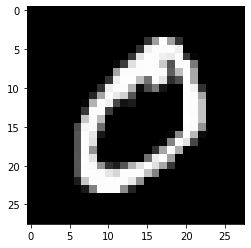

In [50]:
plt.imshow(X_train[1], cmap="gray")

In [51]:
y_train[1]

0

In [52]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [53]:
# preprocessing the image
image_height, image_width = 28, 28
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

In [54]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [55]:
# change to string
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [56]:
X_train /= 255.0
X_test /= 255.0

In [57]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [58]:
# one hot encoding convert target variable
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [59]:
y_train.shape

(60000, 10)

In [60]:
y_test.shape

(10000, 10)

In [61]:
# going with a sequence neural network
model = Sequential()

In [62]:
# creating a dense layer

model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [63]:
# compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
#train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1845 - accuracy: 0.9428 - val_loss: 0.0964 - val_accuracy: 0.9699
Epoch 2/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0803 - accuracy: 0.9755 - val_loss: 0.0768 - val_accuracy: 0.9769
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0572 - accuracy: 0.9823 - val_loss: 0.0763 - val_accuracy: 0.9777
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0413 - accuracy: 0.9861 - val_loss: 0.0943 - val_accuracy: 0.9749
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.0854 - val_accuracy: 0.9758
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0928 - val_accuracy: 0.9757
Epoch 7/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0996 -

In [69]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1343 - accuracy: 0.9823


In [70]:
score

[0.1343420147895813, 0.9822999835014343]